#CISC-873-DM-F22-A2: Whether a first date will lead to a relationship

the goal is Predict the outcome of a specific speed dating session 
based on the profile of two people

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.0 MB/s 


#Download data from kaggle

In [ ]:
 !pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cisc-873-dm-f22-a2

  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 138MB/s]


In [ ]:
!unzip /content/cisc-873-dm-f22-a2.zip

Archive:  /content/cisc-873-dm-f22-a2.zip
  inflating: Speed Dating Data Description.pdf  
  inflating: test.csv                
  inflating: train.csv               


#Data Loading 


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#read train and test files
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#Exploration of training data

In [ ]:
df_train.shape

(5909, 192)

In [ ]:
df_train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 192 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    gender    5909 non-null   int64  
 1    idg       5909 non-null   int64  
 2    condtn    5909 non-null   int64  
 3    wave      5909 non-null   int64  
 4    round     5909 non-null   int64  
 5    position  5909 non-null   int64  
 6    positin1  4591 non-null   float64
 7    order     5909 non-null   int64  
 8    partner   5909 non-null   int64  
 9    pid       5901 non-null   float64
 10   match     5909 non-null   int64  
 11   int_corr  5800 non-null   float64
 12   samerace  5909 non-null   int64  
 13   age_o     5844 non-null   float64
 14   race_o    5861 non-null   float64
 15   pf_o_att  5850 non-null   float64
 16   pf_o_sin  5850 non-null   float64
 17   pf_o_int  5850 non-null   float64
 18   pf_o_fun  5843 non-null   float64
 19   pf_o_amb  5836 non-null   float64
 20   pf_o_s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
listofcoldf_train=[]
for i in df_train.columns:
  listofcoldf_train.append(i)
listofcoldf_train

['gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 '

###Check the data for missing values in training data


In [ ]:
df_train.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
id             0
Length: 192, dtype: int64

In [ ]:
df_train.isnull().sum().sum()

304971

In [ ]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df_train = pd.DataFrame({
                                 'countnull':df_train.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'type':df_train.dtypes
                                 })

In [ ]:
missing_value_df_train

,countnull,percent_missing,type
gender,0,0.000000,int64
idg,0,0.000000,int64
condtn,0,0.000000,int64
wave,0,0.000000,int64
round,0,0.000000,int64
...,...,...,...
sinc5_3,4496,76.087324,float64
intel5_3,4496,76.087324,float64
fun5_3,4496,76.087324,float64
amb5_3,4496,76.087324,float64


In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(df_train)

Your selected dataframe has 192 columns.
There are 181 columns that have missing values.


,Missing Values,% of Total Values
num_in_3,5449,92.2
numdat_3,4849,82.1
expnum,4627,78.3
amb7_2,4519,76.5
sinc7_2,4519,76.5
...,...,...
tvsports,58,1.0
race_o,48,0.8
field,45,0.8
race,45,0.8


##Check the data for duplicates 

In [ ]:
df_train.shape

(5909, 192)

In [ ]:
df_train.duplicated().any()

False

In [ ]:
#lets drop duplicates (if any)
df_train.drop_duplicates(inplace=True)

In [ ]:
df_train.shape

(5909, 192)

#imp

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.3 MB/s 


In [ ]:
import pickle

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_pred):
  #Get the confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred,labels=[0,1])
 
  #print(cf_matrix)
     
  group_counts = ["{0:0.0f}".format(value) for value in
      cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
            cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1, v2 in
  zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('  Confusion Matrix  \n\n');
  ax.set_xlabel('\nPredicted labels')
  ax.set_ylabel('Actual labels ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels([0,1])
  ax.yaxis.set_ticklabels([0,1])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
#visualization for roc_curve
from sklearn.metrics import roc_curve , roc_auc_score
def plot_roc_curve(y_test, y_pred):
  #calculate and virtualize the roc curve for the test set
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  plt.plot(fpr, tpr, 'r', label = 'AUC = %0.4f' % roc_auc)
  plt.plot(fpr, tpr, color='red', label='')
  plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend(loc = 'lower right')
  plt.grid()

#First Solution

##Data Cleaning for training data

In [ ]:
df_train_FS=pd.read_csv('train.csv')

In [ ]:
df_train_FS.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


###ids

first drop any id (id, idg, partner, pid)

In [ ]:
df_train_FS.drop(['id', 'idg','partner', 'pid'], axis=1, inplace = True)

###gender

In [ ]:
df_train_FS['gender'].unique()

array([0, 1])

In [ ]:
df_train_FS['gender'].dtypes

dtype('int64')

gender
Female=0,Male=1
the type of gender is int but should be category because 0 represent female and 1 represent male 

In [ ]:
df_train_FS["gender"] = df_train_FS['gender'].astype('category')

In [ ]:
df_train_FS['gender'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [ ]:
df_train_FS['gender'].isnull().sum()

0

###condtn

In [ ]:
df_train_FS['condtn'].value_counts()

2    4874
1    1035
Name: condtn, dtype: int64

In [ ]:
df_train_FS['condtn'].dtypes

dtype('int64')

condtn
the type of condtn is int but should be category because 1 represent limited choice and 2 represent extensive choice





In [ ]:
df_train_FS["condtn"] = df_train_FS['condtn'].astype('category')

In [ ]:
df_train_FS['condtn'].dtypes

CategoricalDtype(categories=[1, 2], ordered=False)

In [ ]:
df_train_FS['condtn'].isnull().sum()

0

###wave

In [ ]:
df_train_FS['wave'].value_counts()

21    672
11    631
9     571
14    503
15    481
4     459
2     425
7     346
19    335
12    263
17    188
3     150
1     146
5     138
8     137
13    126
10    113
16     73
20     66
18     52
6      34
Name: wave, dtype: int64

In [ ]:
df_train_FS['wave'].isnull().sum()

0

###zipcode

In [ ]:
df_train_FS['zipcode'].unique()

array([nan, '2,021', '10,471', '66,208', '10,021', '8,003', '21,701',
       '85,283', '27,701', '395,001', '630,090', '519,000', '8,025',
       '7,032', '11,001', '76,513', '30,345', '7,410', '43,220', '77,546',
       '10,803', '11,023', '2,155', '13,850', '78,110', '11,746',
       '91,730', '10,012', '91,754', '10,514', '98,115', '0', '77,096',
       '87,004', '87,110', '7,605', '80,798', '8,091', '370,138',
       '400,051', '7,624', '7,076', '11,364', '77,024', '19,151',
       '60,521', '7,620', '28,035', '53,705', '84,108', '33,183',
       '29,501', '22,151', '560,032', '10,128', '13,827', '20,852',
       '4,605', '33,418', '60,611', '85,201', '92,075', '77,095',
       '11,572', '92,064', '7,661', '80,220', '78,230', '60,089',
       '11,570', '94,133', '67,111', '77,026', '94,960', '135,110',
       '55,391', '78,759', '1,173', '80,131', '46,818', '16,510',
       '10,025', '14,075', '11,419', '7,512', '94,536', '92,602',
       '16,146', '92,028', '33,414', '1,801', '90,

In [ ]:
df_train_FS['zipcode'].isnull().sum()

720

In [ ]:
df_train_FS["zipcode"] = df_train_FS['zipcode'].str.replace(',','').astype('float')

In [ ]:
df_train_FS["zipcode"].unique()

array([        nan, 2.02100e+03, 1.04710e+04, 6.62080e+04, 1.00210e+04,
       8.00300e+03, 2.17010e+04, 8.52830e+04, 2.77010e+04, 3.95001e+05,
       6.30090e+05, 5.19000e+05, 8.02500e+03, 7.03200e+03, 1.10010e+04,
       7.65130e+04, 3.03450e+04, 7.41000e+03, 4.32200e+04, 7.75460e+04,
       1.08030e+04, 1.10230e+04, 2.15500e+03, 1.38500e+04, 7.81100e+04,
       1.17460e+04, 9.17300e+04, 1.00120e+04, 9.17540e+04, 1.05140e+04,
       9.81150e+04, 0.00000e+00, 7.70960e+04, 8.70040e+04, 8.71100e+04,
       7.60500e+03, 8.07980e+04, 8.09100e+03, 3.70138e+05, 4.00051e+05,
       7.62400e+03, 7.07600e+03, 1.13640e+04, 7.70240e+04, 1.91510e+04,
       6.05210e+04, 7.62000e+03, 2.80350e+04, 5.37050e+04, 8.41080e+04,
       3.31830e+04, 2.95010e+04, 2.21510e+04, 5.60032e+05, 1.01280e+04,
       1.38270e+04, 2.08520e+04, 4.60500e+03, 3.34180e+04, 6.06110e+04,
       8.52010e+04, 9.20750e+04, 7.70950e+04, 1.15720e+04, 9.20640e+04,
       7.66100e+03, 8.02200e+04, 7.82300e+04, 6.00890e+04, 1.157

In [ ]:
df_train_FS["zipcode"] = df_train_FS['zipcode'].astype('category')

###from

In [ ]:
df_train_FS['from'].unique()

array(['Palo Alto, CA', 'Boston, MA', 'Bombay, India', 'Washington, DC',
       'Midwest USA', 'San Francisco', 'India/Venezuela', 'new york city',
       'Maryland', 'Arizona', 'Brooklyn, NY', 'India', 'Siberia', 'china',
       'UK', 'Spain', 'New Jersey', 'New York', 'Texas', 'Atlanta',
       'New York Area/ New Jersey', 'Ohio', 'Greenwich, CT',
       'Tokyo, Japan', 'Canada', 'California (West Coast)', 'Vestal',
       'France', 'California', 'NY', 'Seattle', 'Yugoslavia',
       'Northern New Jersey', 'Albuquerque, NM', 'Austin, TX',
       'New Mexico', 'Russia/Germany', 'California, New Jersey',
       'Azerbaijan', 'England', 'Minneapolis', 'New York City', 'Houston',
       'Philadelphia', 'Chicago', 'Budapest', 'TN', 'spain', 'Germany',
       'Salt Lake City', 'NYC', 'ottawa, canada', 'Miami',
       'Wash DC (4 yrs)', 'New York, NY', 'Florida', 'california',
       'Texas & Boston', 'BEIJING, CHINA', 'Colorado',
       'London & New York', 'San Francisco(home)/Los Angeles

In [ ]:
df_train_FS['from'].isnull().sum()

58

"from" and "zipcode" is equlivant so drop "from" because it is categorical and have too varied values to be able to gain insight 

In [ ]:
df_train_FS.drop(['from'], axis=1, inplace = True)

###career_c

In [ ]:
df_train_FS['career_c'].unique()

array([ 2.,  7.,  9., 10.,  5.,  4.,  1.,  3., 15.,  6., 11., 16., 17.,
        8., nan, 13., 12., 14.])

In [ ]:
df_train_FS['career_c'].isnull().sum()

100

In [ ]:
df_train_FS['career_c'].dtypes

dtype('float64')

career_c the type of career_c is float but should be category because 1= Lawyer 
2= Academic/Research 
3= Psychologist 
4= Doctor/Medicine 
5=Engineer 
6= Creative Arts/Entertainment 
7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
8= Real Estate 
9= International/Humanitarian Affairs 
10= Undecided 
11=Social Work
12=Speech Pathology
13=Politics
14=Pro sports/Athletics
15=Other
16=Journalism
17=Architecture


In [ ]:
df_train_FS["career_c"] = df_train_FS['career_c'].astype('category')

###career

In [ ]:
df_train_FS['career'].unique()

array(['University President', 'Engineer or iBanker or consultant',
       'Real Estate Consulting', 'public service', 'undecided',
       'Consulting', 'Operations Research', 'nutrition and dental',
       'High School Social Studies Teacher', 'Educator',
       'Business Management and Information Technology',
       'Investment Banking', 'a research position', 'Finance', 'Business',
       'millionaire', 'teacher and performer', 'Law',
       'scientific research', 'International Business', 'Scientist',
       'investment banking', 'School Psychologist', 'Work at the UN',
       'Engineer', 'not sure yet :)', 'college professor',
       "assistant master of the universe (otherwise it's too much work)",
       'Entrepreneur', 'LAWYER', 'Historian', 'Clinical Social Worker',
       'Teacher', 'Private Equity', 'lawyer/policy work',
       'writer/producer', 'attorney', 'business',
       'Security Policy - Homeland Defense', 'Social work', 'Researcher',
       'physician', 'Developmen

In [ ]:
df_train_FS['career'].isnull().sum()

64

"career_c" is equlivant to "career",so drop "career"

In [ ]:
df_train_FS.drop(['career'],inplace=True, axis=1)

###field_cd

In [ ]:
df_train_FS['field_cd'].unique()

array([ 9.,  5., 13.,  8., 16., 10.,  3.,  1.,  2., 18.,  7., 11., 14.,
        4.,  6., 15., 17., 12., nan])

In [ ]:
df_train_FS['field_cd'].isnull().sum()

59

In [ ]:
df_train_FS['field_cd'].dtypes

dtype('float64')

field_cd
the type of field_cd is float but should be category because
1= Law 
2= Math
3= Social Science, Psychologist 
4= Medical Science, Pharmaceuticals, and Bio Tech 
5= Engineering 
6= English/Creative Writing/ Journalism 
7= History/Religion/Philosophy 
8= Business/Econ/Finance 
9= Education, Academia 
10= Biological Sciences/Chemistry/Physics
11= Social Work 
12= Undergrad/undecided 
13=Political Science/International Affairs 
14=Film
15=Fine Arts/Arts Administration
16=Languages
17=Architecture
18=Other


In [ ]:
df_train_FS["field_cd"] = df_train_FS['field_cd'].astype('category')


###field

In [ ]:
df_train_FS['field'].unique()

array(['Ed.D. in higher education policy at TC', 'Engineering',
       'Urban Planning', 'International Affairs', 'Business', 'MBA',
       'Operations Research (SEAS)', 'french', 'nutrition',
       'MA Teaching Social Studies', 'Education',
       'Electrical Engineering', 'Operations Research',
       'electrical engineering', 'business', 'sociology', 'Law',
       'Ecology', 'Genetics', 'School Psychology', 'Human Rights',
       'MA in Quantitative Methods', 'Mathematics', 'Climate Dynamics',
       'Finance/Economics', 'LAW', 'History',
       'Biochemistry & Molecular Biophysics', 'Social Work',
       'MA Science Education', 'film', 'law',
       'International Security Policy - SIPA', 'Sociology', 'Physics',
       'medicine', 'International Development', 'climate change',
       'Curriculum and Teaching/Giftedness',
       'Master in Public Administration', 'Neurobiology', 'Biology',
       'Biomedical Engineering', 'microbiology', 'Mathematics, PhD',
       'History of Relig

In [ ]:
df_train_FS['field'].isnull().sum()

45

"field_cd" is equlivant to "career",so drop "field"

In [ ]:
df_train_FS.drop(['field'],inplace=True, axis=1)

###income

In [ ]:
df_train_FS['income'].unique()

array([nan, '45,300.00', '46,138.00', '55,080.00', '36,594.00',
       '39,394.00', '16,908.00', '49,642.00', '23,361.00', '46,800.00',
       '40,749.00', '48,944.00', '63,351.00', '75,347.00', '42,640.00',
       '57,513.00', '39,919.00', '32,649.00', '32,508.00', '109,031.00',
       '37,881.00', '37,754.00', '28,989.00', '28,759.00', '45,695.00',
       '64,716.00', '29,809.00', '69,487.00', '32,159.00', '41,191.00',
       '36,782.00', '27,248.00', '61,152.00', '49,409.00', '30,147.00',
       '50,725.00', '50,572.00', '48,785.00', '25,589.00', '50,745.00',
       '52,388.00', '53,229.00', '29,236.00', '55,550.00', '55,138.00',
       '28,891.00', '20,000.00', '12,063.00', '47,005.00', '56,096.00',
       '41,547.00', '31,148.00', '29,279.00', '33,772.00', '37,315.00',
       '35,960.00', '46,272.00', '35,627.00', '52,805.00', '97,972.00',
       '25,831.00', '25,786.00', '46,608.00', '32,386.00', '60,000.00',
       '28,240.00', '16,767.00', '37,994.00', '35,867.00', '43,367.00',

convert "income"  from object to float and remove any comma(,)

In [ ]:
df_train_FS["income"] = df_train_FS['income'].str.replace(',','').astype('float')

In [ ]:
df_train_FS["income"].unique()

array([    nan,  45300.,  46138.,  55080.,  36594.,  39394.,  16908.,
        49642.,  23361.,  46800.,  40749.,  48944.,  63351.,  75347.,
        42640.,  57513.,  39919.,  32649.,  32508., 109031.,  37881.,
        37754.,  28989.,  28759.,  45695.,  64716.,  29809.,  69487.,
        32159.,  41191.,  36782.,  27248.,  61152.,  49409.,  30147.,
        50725.,  50572.,  48785.,  25589.,  50745.,  52388.,  53229.,
        29236.,  55550.,  55138.,  28891.,  20000.,  12063.,  47005.,
        56096.,  41547.,  31148.,  29279.,  33772.,  37315.,  35960.,
        46272.,  35627.,  52805.,  97972.,  25831.,  25786.,  46608.,
        32386.,  60000.,  28240.,  16767.,  37994.,  35867.,  43367.,
        18283.,  40409.,  38022.,  53539.,  71787.,  58802.,  31560.,
        46837.,  46792.,  24997.,  65708.,  30146.,  48652.,  17378.,
        73073.,  42651.,  53501.,  81266.,  23988.,  25401.,  80608.,
        36673.,  42390.,  77112.,  18619.,  61686.,  31857.,  57501.,
        22805.,  537

###mn_sat

In [ ]:
df_train_FS['mn_sat'].unique()

array(['1,290.00', nan, '1,400.00', '1,330.00', '1,210.00', '1,097.00',
       '1,460.00', '1,410.00', '1,309.00', '1,430.00', '1,155.00', '990',
       '1,340.00', '1,360.00', '1,060.00', '1,450.00', '1,260.00',
       '1,191.00', '1,110.00', '1,365.00', '1,178.00', '1,310.00',
       '1,212.00', '1,490.00', '1,242.00', '1,200.00', '1,030.00',
       '1,220.00', '1,130.00', '1,214.00', '1,188.00', '1,258.00',
       '1,227.00', '1,050.00', '1,320.00', '1,331.00', '1,470.00',
       '1,341.00', '1,206.00', '1,014.00', '1,105.00', '1,180.00',
       '1,157.00', '1,140.00', '914', '1,159.00', '1,034.00', '1,402.00',
       '1,267.00', '1,011.00', '1,250.00', '1,380.00', '1,090.00',
       '1,308.00', '1,270.00', '1,185.00', '1,100.00', '1,099.00',
       '1,160.00', '1,239.00', '1,280.00', '1,092.00', '1,230.00',
       '1,070.00', '1,149.00', '1,370.00', '1,134.00', '1,215.00',
       '1,080.00'], dtype=object)

convert "mn_sat"  from object to float and remove any comma(,)

In [ ]:
df_train_FS["mn_sat"] = df_train_FS['mn_sat'].str.replace(',','').astype('float')

In [ ]:
df_train_FS["mn_sat"].unique()

array([1290.,   nan, 1400., 1330., 1210., 1097., 1460., 1410., 1309.,
       1430., 1155.,  990., 1340., 1360., 1060., 1450., 1260., 1191.,
       1110., 1365., 1178., 1310., 1212., 1490., 1242., 1200., 1030.,
       1220., 1130., 1214., 1188., 1258., 1227., 1050., 1320., 1331.,
       1470., 1341., 1206., 1014., 1105., 1180., 1157., 1140.,  914.,
       1159., 1034., 1402., 1267., 1011., 1250., 1380., 1090., 1308.,
       1270., 1185., 1100., 1099., 1160., 1239., 1280., 1092., 1230.,
       1070., 1149., 1370., 1134., 1215., 1080.])

###tuition

In [ ]:
df_train_FS['tuition'].unique()

array(['21,645.00', nan, '26,019.00', '34,290.00', '12,900.00',
       '10,352.00', '27,230.00', '17,125.00', '27,395.00', '26,892.00',
       '15,162.00', '26,908.00', '9,162.00', '13,258.00', '10,096.00',
       '25,380.00', '26,062.00', '11,424.00', '25,917.00', '14,388.00',
       '27,982.00', '8,421.00', '24,794.00', '23,187.00', '25,000.00',
       '9,811.00', '10,450.00', '27,025.00', '10,052.00', '25,026.00',
       '14,433.00', '9,210.00', '25,425.00', '27,728.00', '10,704.00',
       '14,915.00', '15,990.00', '26,630.00', '21,960.00', '15,309.00',
       '26,580.00', '20,100.00', '33,585.00', '26,100.00', '9,451.00',
       '26,562.00', '11,311.00', '26,377.00', '25,020.00', '25,335.00',
       '17,030.00', '16,650.00', '26,170.00', '13,211.00', '21,168.00',
       '17,715.00', '25,533.00', '15,260.00', '12,350.00', '34,300.00',
       '25,504.00', '22,481.00', '11,132.00', '14,493.00', '18,720.00',
       '17,808.00', '24,742.00', '14,942.00', '9,790.00', '24,036.00',
      

convert "tuition"  from object to float and remove any comma(,)

In [ ]:
df_train_FS["tuition"] = df_train_FS['tuition'].str.replace(',','').astype('float')

In [ ]:
df_train_FS["tuition"].unique()

array([21645.,    nan, 26019., 34290., 12900., 10352., 27230., 17125.,
       27395., 26892., 15162., 26908.,  9162., 13258., 10096., 25380.,
       26062., 11424., 25917., 14388., 27982.,  8421., 24794., 23187.,
       25000.,  9811., 10450., 27025., 10052., 25026., 14433.,  9210.,
       25425., 27728., 10704., 14915., 15990., 26630., 21960., 15309.,
       26580., 20100., 33585., 26100.,  9451., 26562., 11311., 26377.,
       25020., 25335., 17030., 16650., 26170., 13211., 21168., 17715.,
       25533., 15260., 12350., 34300., 25504., 22481., 11132., 14493.,
       18720., 17808., 24742., 14942.,  9790., 24036., 25839., 14695.,
       27240., 10332., 24497.,  9729., 26871., 25552., 25847., 12444.,
       25555.,  3730., 13413., 26786.,  9620., 11360., 13046., 10356.,
       26376., 14589., 10800., 23500., 22170., 20337.,  9696., 27350.,
       11570., 18656., 12696., 15004., 10222., 27100.,  8100., 14380.,
       26720., 25890.,  9168.,  2406., 13872., 27076., 19525., 24921.,
      

###go_out

In [ ]:
df_train_FS['go_out'].unique()

array([ 3.,  1.,  2.,  4.,  5., nan,  6.,  7.])

How often do you go out (not necessarily on dates)?
Several times a week=1
Twice a week=2
Once a week=3
Twice a month=4
Once a month=5
Several times a year=6
Almost never=7

In [ ]:
df_train_FS['go_out']=8-df_train_FS['go_out']

In [ ]:
df_train_FS['go_out'].unique()

array([ 5.,  7.,  6.,  4.,  3., nan,  2.,  1.])

###date

In [ ]:
df_train_FS['date'].unique()

array([ 6.,  4.,  5.,  7.,  3.,  2.,  1., nan])

In general, how frequently do you go on dates?
Several times a week=1
Twice a week=2
Once a week=3
Twice a month=4
Once a month=5
Several times a year=6
Almost never=7
these	variables	to	be	easier	to	interpret	when	the	scale	was	
reversed,	and	so we subtracted	each row from	8 to	accomplish	this.

In [ ]:
df_train_FS['date']=8-df_train_FS['date']

In [ ]:
df_train_FS['date'].unique()

array([ 2.,  4.,  3.,  1.,  5.,  6.,  7., nan])

###samerace

In [ ]:
df_train_FS['samerace'].value_counts()

0    3567
1    2342
Name: samerace, dtype: int64

In [ ]:
df_train_FS['samerace'].dtypes

dtype('int64')

samerace
participant and the partner were the same race. 1= yes, 0=no
the type of samerace is int but should be category because 0 represent not same race and 1 represent same race

In [ ]:
df_train_FS["samerace"] = df_train_FS['samerace'].astype('category')


In [ ]:
df_train_FS['samerace'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

###race

In [ ]:
df_train_FS['race'].value_counts()

2.0    3313
4.0    1424
3.0     483
6.0     350
1.0     294
Name: race, dtype: int64

the	race	variable	was	an	integer	field, with each	number	corresponding to	a	race.		
In	the	original	dataset,	the	race	“Other”	was	listed	as	the	number	6.		Since	there	was	no race	
with	the	number	5,	we changed	all	race variables labeled “Other”	from	6	to	5.

In [ ]:
df_train_FS['race']= df_train_FS['race'].replace([6],5)


In [ ]:
df_train_FS['race'].value_counts()

2.0    3313
4.0    1424
3.0     483
5.0     350
1.0     294
Name: race, dtype: int64

race
the type of race is float but should be category because
Black/African American=1
European/Caucasian-American=2
Latino/Hispanic American=3
Asian/Pacific Islander/Asian-American=4
Other=5

In [ ]:
df_train_FS["race"] = df_train_FS['race'].astype('category')


In [ ]:
df_train_FS['race'].dtypes

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=False)

###race_o

In [ ]:
df_train_FS['race_o'].value_counts()

2.0    3307
4.0    1420
3.0     475
6.0     359
1.0     300
Name: race_o, dtype: int64

In [ ]:
df_train_FS['race_o'].dtypes

dtype('float64')

the	race	variable	was	an	integer	field, with each	number	corresponding to	a	race.		
In	the	original	dataset,	the	race	“Other”	was	listed	as	the	number	6.		Since	there	was	no race	
with	the	number	5,	we changed	all	race variables labeled “Other”	from	6	to	5.

In [ ]:
df_train_FS['race_o']= df_train_FS['race_o'].replace([6],5)


In [ ]:
df_train_FS['race_o'].value_counts()

2.0    3307
4.0    1420
3.0     475
5.0     359
1.0     300
Name: race_o, dtype: int64

race
the type of race is float but should be category because
Black/African American=1
European/Caucasian-American=2
Latino/Hispanic American=3
Asian/Pacific Islander/Asian-American=4
Other=5

In [ ]:
df_train_FS["race_o"] = df_train_FS['race_o'].astype('category')


In [ ]:
df_train_FS['race_o'].dtypes

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=False)

###goal

In [ ]:
df_train_FS['goal'].value_counts()

1.0    2406
2.0    2131
3.0     443
5.0     369
6.0     294
4.0     208
Name: goal, dtype: int64

In [ ]:
df_train_FS['goal'].dtypes

dtype('float64')

goal
the type of goal is float but should be category because
Seemed like a fun night out=1
To meet new people=2
To get a date=3
Looking for a serious relationship=4
To say I did it=5
Other=6

In [ ]:
df_train_FS["goal"] = df_train_FS['goal'].astype('category')


In [ ]:
df_train_FS['goal'].dtypes

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0], ordered=False)

###undergra

In [ ]:
df_train_FS['undergra'].unique()

array(['University of Michigan-Ann Arbor', nan,
       'Rizvi College of Architecture, Bombay University',
       'Harvard College', 'colby college, waterville, me', 'UW Madison',
       'Arizona State', 'Harvard',
       'S.V Regional Engineering College,India',
       'Novosibirsk State University', 'Oxford', 'Princeton University',
       'Rice', 'Brown', 'Tufts University', 'McGill University',
       'Cal Berkeley', 'Ecole Normale Sup\x8erieure, Paris',
       'Columbia College', 'California State University Los Angeles',
       'University of Washington', 'University of Texas', 'NYU',
       'Cornell University', 'Univ of New Mexico', 'Stanford University',
       'Princeton', 'Univ. of Bombay', 'Penn State University',
       'Sarah Lawrence College', 'Illinois', 'Bombay, India',
       'University of Rochester', 'Columbia',
       'University of Wisconsin-Madison', 'COOPER UNION',
       'Harvey Mudd College (Physics)', 'Bennington College',
       'Ecole Polytechnique (France)

undergra is not usfull to be able to gain insight so drop it

In [ ]:
df_train_FS.drop(['undergra'], axis=1, inplace = True)


###show numerical and categorical data

In [ ]:
df_train_FS_numeric = df_train_FS.select_dtypes(include=np.number)


In [ ]:
df_train_FS_numeric.shape

(5909, 175)

In [ ]:
df_train_FS_numeric.head()

,wave,round,position,positin1,order,match,int_corr,age_o,pf_o_att,pf_o_sin,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,14,18,2,2.0,14,0,-0.03,27.0,30.00,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,10,2,NaN,8,0,0.21,24.0,5.00,15.00,...,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
2,13,10,8,8.0,10,0,0.43,34.0,15.00,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,20,18,13.0,6,0,0.72,25.0,13.21,18.87,...,8.0,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN
4,14,20,6,6.0,20,0,0.33,27.0,15.00,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
percent_missing = df_train_FS_numeric.isnull().sum() * 100 / len(df_train_FS_numeric)
missing_value_df_numeric= pd.DataFrame({
                                 'countnull':df_train_FS_numeric.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'type':df_train_FS_numeric.dtypes
                                 })

In [ ]:
missing_value_df_numeric

,countnull,percent_missing,type
wave,0,0.000000,int64
round,0,0.000000,int64
position,0,0.000000,int64
positin1,1318,22.304959,float64
order,0,0.000000,int64
...,...,...,...
attr5_3,4496,76.087324,float64
sinc5_3,4496,76.087324,float64
intel5_3,4496,76.087324,float64
fun5_3,4496,76.087324,float64


In [ ]:
df_train_FS_cat=df_train_FS.select_dtypes(include =['category'])

In [ ]:
df_train_FS_cat.shape

(5909, 9)

In [ ]:
df_train_FS_cat.head()

,gender,condtn,samerace,race_o,field_cd,race,zipcode,goal,career_c
0,0,2,0,2.0,9.0,3.0,NaN,1.0,2.0
1,1,1,0,4.0,5.0,2.0,2021.0,5.0,7.0
2,1,1,0,2.0,5.0,5.0,NaN,1.0,7.0
3,1,2,1,2.0,13.0,2.0,10471.0,2.0,9.0
4,1,2,0,4.0,8.0,2.0,66208.0,2.0,10.0


In [ ]:
percent_missing = df_train_FS_cat.isnull().sum() * 100 / len(df_train_FS_cat)
missing_value_df_cat= pd.DataFrame({
                                 'countnull':df_train_FS_cat.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'type':df_train_FS_cat.dtypes
                                 })

In [ ]:
missing_value_df_cat

,countnull,percent_missing,type
gender,0,0.000000,category
condtn,0,0.000000,category
samerace,0,0.000000,category
race_o,48,0.812320,category
field_cd,59,0.998477,category
race,45,0.761550,category
zipcode,720,12.184803,category
goal,58,0.981554,category
career_c,100,1.692334,category


##

##Data Cleaning for test data

In [ ]:
df_test_FS_K=pd.read_csv('test.csv')

In [ ]:
df_test_FS_K.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052


In [ ]:
df_test_FS_K.drop(['id', 'idg','partner', 'pid'], axis=1, inplace = True)
df_test_FS_K["gender"] = df_test_FS_K['gender'].astype('category')
df_test_FS_K["condtn"] = df_test_FS_K['condtn'].astype('category')
df_test_FS_K.drop(['from'], axis=1, inplace = True)
df_test_FS_K.drop(['career'],inplace=True, axis=1)
df_test_FS_K["career_c"] = df_test_FS_K['career_c'].astype('category')
df_test_FS_K.drop(['field'],inplace=True, axis=1)
df_test_FS_K["field_cd"] = df_test_FS_K['field_cd'].astype('category')
df_test_FS_K["mn_sat"] = df_test_FS_K['mn_sat'].str.replace(',','').astype('float')
df_test_FS_K["income"] = df_test_FS_K['income'].str.replace(',','').astype('float')
df_test_FS_K["tuition"] = df_test_FS_K['tuition'].str.replace(',','').astype('float')
df_test_FS_K["goal"] = df_test_FS_K['goal'].astype('category')
df_test_FS_K["race_o"] = df_test_FS_K['race_o'].astype('category')
df_test_FS_K["race"] = df_test_FS_K['race'].astype('category')
df_test_FS_K['race_o']= df_test_FS_K['race_o'].replace([6],5)
df_test_FS_K['race']= df_test_FS_K['race'].replace([6],5)
df_test_FS_K["samerace"] = df_test_FS_K['samerace'].astype('category')
df_test_FS_K['date']=8-df_test_FS_K['date']
df_test_FS_K['go_out']=8-df_test_FS_K['go_out']
df_test_FS_K.drop(['undergra'], axis=1, inplace = True)
df_test_FS_K["zipcode"] = df_test_FS_K['zipcode'].str.replace(',','').astype('float')
df_test_FS_K["zipcode"] = df_test_FS_K['zipcode'].astype('category')

In [ ]:
df_test_FS_K.shape

(2469, 183)

In [ ]:
df_test_FS_K.head()

,gender,condtn,wave,round,position,positin1,order,int_corr,samerace,age_o,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,2,2,16,3,NaN,13,-0.13,0,21.0,...,5.0,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
1,0,2,14,18,6,6.0,4,0.12,0,24.0,...,6.0,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0
2,1,2,9,20,10,16.0,15,0.11,0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,2,19,15,NaN,8,0.11,1,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2,7,16,7,7.0,10,0.45,0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x_test_FS_k = df_test_FS_K

In [ ]:
print("x_test_FS_k.shape >>>> ",x_test_FS_k.shape)

x_test_FS_k.shape >>>>  (2469, 183)


##split the data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X=df_train_FS.loc[:, df_train_FS.columns != 'match']
#X

In [ ]:
y=df_train_FS['match']

In [ ]:
X_train_FS, X_val_FS, y_train_FS, y_val_FS = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
print("X_train_FS.shape >>>> ",X_train_FS.shape)
print("y_train_FS.shape >>>> ",y_train_FS.shape)
print("X_val_FS.shape >>>> ",X_val_FS.shape)
print("y_val_FS.shape >>>> ",y_val_FS.shape)

X_train_FS.shape >>>>  (3959, 183)
y_train_FS.shape >>>>  (3959,)
X_val_FS.shape >>>>  (1950, 183)
y_val_FS.shape >>>>  (1950,)


##Trials


###extract numeric features and categorical features names

In [ ]:
# numeric features can be selected by: (based on the df2.info() output )
features_numeric = list(X_train_FS.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(X_train_FS.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['wave', 'round', 'position', 'positin1', 'order', 'int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'mn_sat', 'tuition', 'imprace', 'imprelig', 'income', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'int

###Pipeline

In [ ]:

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)



###trial ( Pipeline(steps=[('preprocessor', preprocessor),('my_classifier',XGBClassifier())]) )

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
XGB_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)
XGB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
# The pipeline object can be used like any sk-learn model
XGB_pipeline = XGB_pipeline.fit(X_train_FS, y_train_FS)

In [ ]:
XGB_pipeline.score(X_train_FS, y_train_FS)

0.9022480424349584

In [ ]:
y_pred_val_XGB_pipeline_FS_T1=XGB_pipeline.predict(X_val_FS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_FS,y_pred_val_XGB_pipeline_FS_T1) 
print("XGB_pipeline_FS_T1_Accuracy:  " , (Accuracy))

XGB_pipeline_FS_T1_Accuracy:   0.8733333333333333


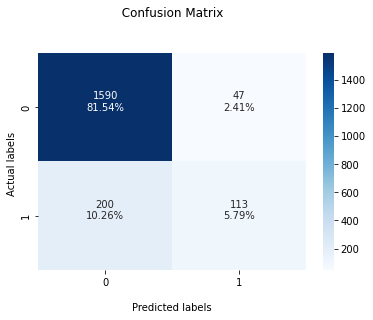

In [ ]:
plot_confusion_matrix(y_val_FS,y_pred_val_XGB_pipeline_FS_T1)

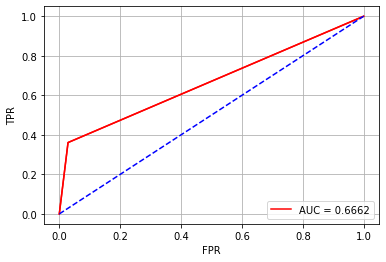

In [ ]:
plot_roc_curve(y_val_FS,y_pred_val_XGB_pipeline_FS_T1)

In [ ]:
y_predict_XGB_pipeline_FS_T1=XGB_pipeline.predict(x_test_FS_k)
y_predict_XGB_pipeline_FS_T1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_XGB_pipeline_FS_T1=XGB_pipeline.predict_proba(x_test_FS_k)
y_predict_pro_XGB_pipeline_FS_T1

array([[0.962104  , 0.03789596],
       [0.8202545 , 0.17974551],
       [0.75078386, 0.24921615],
       ...,
       [0.9585454 , 0.04145461],
       [0.964332  , 0.03566801],
       [0.9868578 , 0.01314221]], dtype=float32)

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_XGB_pipeline_FS_T1[:,1]

submission.to_csv('XGB_pipeline_FS_T1.csv', index=False)

###trial (Grid Search with Cross-validation && XGBClassifier())


In [ ]:
XGB_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)
XGB_pipeline

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
XGB_param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'my_classifier__n_estimators': [30, 40],  
    'my_classifier__max_depth':[10, 20]       
}

Fitting 2 folds for each of 18 candidates, totalling 36 fits
best score 0.8495952375458081
best score {'my_classifier__max_depth': 20, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_XGB_FS = GridSearchCV(
    XGB_pipeline, XGB_param_grid, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search_XGB_FS.fit(X_train_FS, y_train_FS)

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_XGB_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_XGB_FS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_XGB_FS.best_estimator_))

In [ ]:
grid_search_XGB_FS.best_estimator_.fit(X_train_FS,y_train_FS)

DecisionTreeClassifier(max_depth=4)

In [ ]:
grid_search_XGB_FS.best_estimator_.score(X_train_FS, y_train_FS)

0.8043478260869565

In [ ]:
y_pred_val_XGB_GS_FS=grid_search_XGB_FS.best_estimator_.predict(X_val_FS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_FS,y_pred_val_XGB_GS_FS) 
print("grid_search_XGB_FS_Accuracy:  " , (Accuracy))

XGB_pipeline_FS_T1_Accuracy:   0.8733333333333333


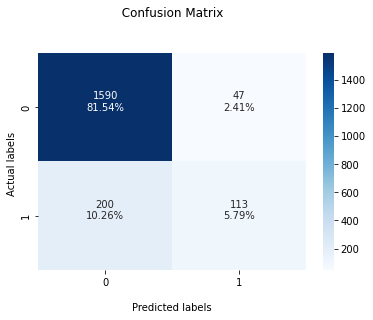

In [ ]:
plot_confusion_matrix(y_val_FS,y_pred_val_XGB_GS_FS)

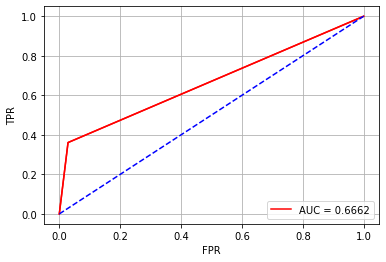

In [ ]:
plot_roc_curve(y_val_FS,y_pred_val_XGB_GS_FS)

In [ ]:
y_predict_XGB_GS_FS=grid_search_XGB_FS.best_estimator_.predict(x_test_FS_k)
y_predict_XGB_GS_FS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_XGB_GS_FS=grid_search_XGB_FS.best_estimator_.predict_proba(x_test_FS_k)
y_predict_pro_XGB_GS_FS

array([[0.962104  , 0.03789596],
       [0.8202545 , 0.17974551],
       [0.75078386, 0.24921615],
       ...,
       [0.9585454 , 0.04145461],
       [0.964332  , 0.03566801],
       [0.9868578 , 0.01314221]], dtype=float32)

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_XGB_GS_FS[:,1]

submission.to_csv('XGB_GS_FS.csv', index=False)

###trial (Random Search with validation set && XGBClassifier())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
# Split Data to Train and Validation
X_train_FS_VS, X_val_FS_VS, y_train_FS_VS, y_val_FS_VS = train_test_split(X_train_FS, y_train_FS, train_size = 0.8, stratify = y_train_FS,random_state =2020)

In [ ]:
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train_FS_VS.index else 0 for x in X_train_FS.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

NameError: ignored

In [ ]:
XGB_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(),
        )
    ]
)
XGB_pipeline

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
XGB_param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'my_classifier__n_estimators': [20, 30, 40],  
    'my_classifier__max_depth':[10, 20, 30]       
}

In [ ]:
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
Random_search_XGB_FS = RandomizedSearchCV(
    XGB_pipeline, XGB_param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

Random_search_XGB_FS.fit(X_train_FS, y_train_FS)

In [ ]:
# best score achieved during the RandomizedSearchCV
print('Random_search VS best score : {:.4f}\n\n'.format(Random_search_XGB_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (Random_search_XGB_FS.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (Random_search_XGB_FS.best_estimator_))

In [ ]:
Random_search_XGB_FS.best_estimator_.fit(X_train_FS, y_train_FS)

In [ ]:
Random_search_XGB_FS.best_estimator_.score(X_train_FS, y_train_FS)

In [ ]:
y_pred_val_XGB_RS_FS=Random_search_XGB_FS.best_estimator_.predict(X_val_FS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_FS,y_pred_val_XGB_RS_FS) 
print("Randomize_search_XGB_FS_Accuracy:  " , (Accuracy))

In [ ]:
plot_confusion_matrix(y_val_FS,y_pred_val_XGB_RS_FS)

In [ ]:
plot_roc_curve(y_val_FS,y_pred_val_XGB_RS_FS)

In [ ]:
y_predict_XGB_RS_FS=Random_search_XGB_FS.best_estimator_.predict(x_test_FS_k)
y_predict_XGB_RS_FS

In [ ]:
y_predict_pro_XGB_RS_FS=Random_search_XGB_FS.best_estimator_.predict_proba(x_test_FS_k)
y_predict_pro_XGB_RS_FS

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_XGB_RS_FS[:,1]

submission.to_csv('XGB_RS_FS.csv', index=False)

###trial (Bayesian Search && RandomForestClassifier)


In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
RF_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('RandomForestClassifier', RandomForestClassifier()
        )
    ]
)
RF_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
# here we specify the search space
RF_param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'RandomForestClassifier__n_estimators': [20, 30, 40],
    'RandomForestClassifier__max_depth':[10, 20, 30]     
}

In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
bayes_search_RF_FS = BayesSearchCV(
     RF_pipeline, RF_param, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

bayes_search_RF_FS.fit(X_train_FS, y_train_FS)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
CPU times: user 1min 26s, sys: 47.4 s, total: 2min 14s
Wall time: 2min 10s


In [ ]:
# best score achieved during the BayesSearchCV
print('BayesSearchCV best score : {:.4f}\n\n'.format(bayes_search_RF_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (bayes_search_RF_FS.best_params_))

# print estimator that was chosen by the BayesSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (bayes_search_RF_FS.best_estimator_))

BayesSearchCV best score : 0.8317


Parameters that give the best results : 

 OrderedDict([('RandomForestClassifier__max_depth', 10), ('RandomForestClassifier__n_estimators', 40), ('preprocessor__num__imputer__strategy', 'mean')])


Estimator that was chosen by the search : 

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
    

In [ ]:
bayes_search_RF_FS.best_estimator_.fit(X_train_FS,y_train_FS)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
bayes_search_RF_FS.best_estimator_.score(X_train_FS, y_train_FS)

0.8949229603435211

In [ ]:
y_pred_val_RF_BS_FS=bayes_search_RF_FS.best_estimator_.predict(X_val_FS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_FS,y_pred_val_RF_BS_FS) 
print("bayes_search_svm_FS_Accuracy:  " , (Accuracy))

bayes_search_svm_FS_Accuracy:   0.8558974358974359


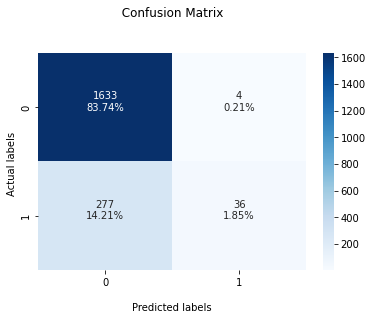

In [ ]:
plot_confusion_matrix(y_val_FS,y_pred_val_RF_BS_FS)

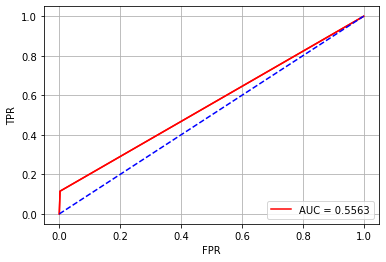

In [ ]:
plot_roc_curve(y_val_FS,y_pred_val_RF_BS_FS)

In [ ]:
y_pred_val_RF_BS_FS=bayes_search_RF_FS.best_estimator_.predict(x_test_FS_k)
y_pred_val_RF_BS_FS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_RF_BS_FS=bayes_search_RF_FS.best_estimator_.predict_proba(x_test_FS_k)
y_predict_pro_RF_BS_FS

array([[0.94622397, 0.05377603],
       [0.71839811, 0.28160189],
       [0.74995551, 0.25004449],
       ...,
       [0.94581504, 0.05418496],
       [0.89377069, 0.10622931],
       [0.9339149 , 0.0660851 ]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_RF_BS_FS[:,1]

submission.to_csv('RF_BS_FS.csv', index=False)

###trial (Random search && svm())

In [ ]:
SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced',probability=True))
    ]
)
SVC_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
SVC_pipline_params = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'my_svc__C': [1, 10, 100, 1e3, 1e4, 1e5],
    'my_svc__gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'my_svc__degree': [1,2,3,4,5,6,7,8],
    'my_svc__kernel': ['linear', 'poly', 'rbf']
}

In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
random_search_svm_FS = RandomizedSearchCV(
    SVC_pipline, SVC_pipline_params, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

random_search_svm_FS.fit(X_train_FS, y_train_FS)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [ ]:
# best score achieved during the RandomizedSearchCV
print('RandomizedSearchCV best score : {:.4f}\n\n'.format(random_search_svm_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (random_search_svm_FS.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (random_search_svm_FS.best_estimator_))

AttributeError: ignored

In [ ]:
random_search_svm_FS.best_estimator_.fit(X_train_FS,y_train_FS)

In [ ]:
random_search_svm_FS.best_estimator_.score(X_train_FS, y_train_FS)

In [ ]:
y_pred_val_svm_RS_FS=random_search_svm_FS.best_estimator_.predict(X_val_FS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_FS,y_pred_val_svm_RS_FS) 
print("random_search_svm_FS_Accuracy:  " , (Accuracy))

In [ ]:
plot_confusion_matrix(y_val_FS,y_pred_val_svm_RS_FS)

In [ ]:
plot_roc_curve(y_val_FS,y_pred_val_svm_RS_FS)

In [ ]:
y_predict_svm_RS_FS=random_search_svm_FS.best_estimator_.predict(x_test_FS_k)
y_predict_svm_RS_FS

In [ ]:
y_predict_pro_svm_RS_FS=random_search_svm_FS.best_estimator_.predict_proba(x_test_FS_k)
y_predict_pro_svm_RS_FS

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_svm_RS_FS[:,1]

submission.to_csv('svm_RS_FS.csv', index=False)

###trial (Random search && logistic regression())

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
LR_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('LogisticRegression', LogisticRegression()
        )
    ]
)
LR_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
LR_param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'LogisticRegression__penalty':['l1','l2'], 
    'LogisticRegression__C':[1,1e2, 1e3,1e5],  
    'LogisticRegression__max_iter':[100,1000,10000],     
}

In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
random_search_LR_FS = RandomizedSearchCV(
    LR_pipeline, LR_param, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

random_search_LR_FS.fit(X_train_FS, y_train_FS)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

CPU times: user 1.97 s, sys: 95.7 ms, total: 2.07 s
Wall time: 33.4 s


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['wave',
                                                                                'round',
                                                                                'position',
                                                                                'positin1',
                      

In [ ]:
# best score achieved during the RandomizedSearchCV
print('RandomizedSearchCV best score : {:.4f}\n\n'.format(random_search_LR_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (random_search_LR_FS.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (random_search_LR_FS.best_estimator_))

RandomizedSearchCV best score : 0.8296


Parameters that give the best results : 

 {'preprocessor__num__imputer__strategy': 'mean', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__max_iter': 10000, 'LogisticRegression__C': 1}


Estimator that was chosen by the search : 

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',

In [ ]:
random_search_LR_FS.best_estimator_.fit(X_train_FS,y_train_FS)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
random_search_LR_FS.best_estimator_.score(X_train_FS, y_train_FS)

0.8888608234402627

In [ ]:
y_pred_val_LR_GS_FS=random_search_LR_FS.best_estimator_.predict(X_val_FS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_FS,y_pred_val_LR_GS_FS) 
print("random_search_LR_FS_Accuracy:  " , (Accuracy))

random_search_LR_FS_Accuracy:   0.8574358974358974


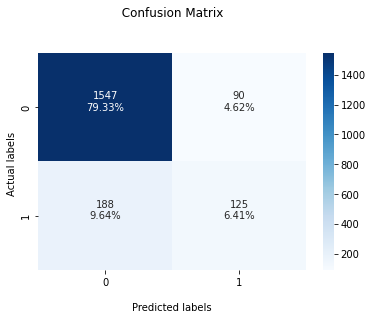

In [ ]:
plot_confusion_matrix(y_val_FS,y_pred_val_LR_GS_FS)

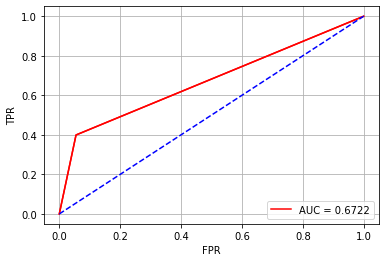

In [ ]:
plot_roc_curve(y_val_FS,y_pred_val_LR_GS_FS)

In [ ]:
y_predict_LR_GS_FS=random_search_LR_FS.best_estimator_.predict(x_test_FS_k)
y_predict_LR_GS_FS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_LR_GS_FS=random_search_LR_FS.best_estimator_.predict_proba(x_test_FS_k)
y_predict_pro_LR_GS_FS

array([[0.92698893, 0.07301107],
       [0.77212642, 0.22787358],
       [0.88020881, 0.11979119],
       ...,
       [0.9888975 , 0.0111025 ],
       [0.97489333, 0.02510667],
       [0.96923857, 0.03076143]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_LR_GS_FS[:,1]

submission.to_csv('LR_RS_FS.csv', index=False)

###trial (Random search && RandomForestClassifier())

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
RF_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('RandomForestClassifier', RandomForestClassifier()
        )
    ]
)
RF_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
# here we specify the search space
RF_param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'RandomForestClassifier__n_estimators': [20, 30, 40],
    'RandomForestClassifier__max_depth':[10, 20, 30]     
}

In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
random_search_RF_FS = RandomizedSearchCV(
    RF_pipeline, RF_param, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

random_search_RF_FS.fit(X_train_FS, y_train_FS)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
CPU times: user 1.34 s, sys: 28.2 ms, total: 1.36 s
Wall time: 9.48 s


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['wave',
                                                                                'round',
                                                                                'position',
                                                                                'positin1',
                      

In [ ]:
# best score achieved during the RandomizedSearchCV
print('RandomizedSearchCV best score : {:.4f}\n\n'.format(random_search_RF_FS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (random_search_RF_FS.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (random_search_RF_FS.best_estimator_))

RandomizedSearchCV best score : 0.8157


Parameters that give the best results : 

 {'preprocessor__num__imputer__strategy': 'most_frequent', 'RandomForestClassifier__n_estimators': 40, 'RandomForestClassifier__max_depth': 10}


Estimator that was chosen by the search : 

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att

In [ ]:
random_search_RF_FS.best_estimator_.fit(X_train_FS,y_train_FS)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                      

In [ ]:
random_search_RF_FS.best_estimator_.score(X_train_FS, y_train_FS)

0.8999747410962364

In [ ]:
y_pred_val_RF_RS_FS=random_search_RF_FS.best_estimator_.predict(X_val_FS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_FS,y_pred_val_RF_RS_FS) 
print("random_search_LR_FS_Accuracy:  " , (Accuracy))

random_search_LR_FS_Accuracy:   0.8553846153846154


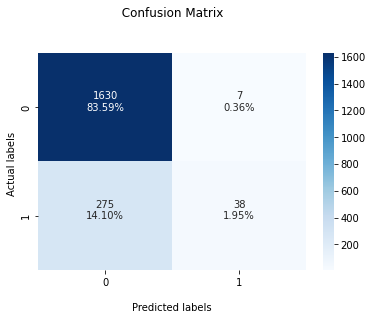

In [ ]:
plot_confusion_matrix(y_val_FS,y_pred_val_RF_RS_FS)

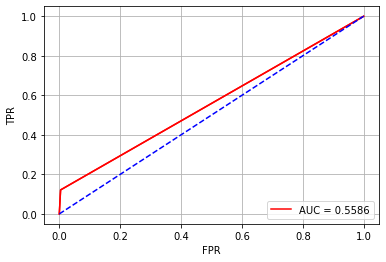

In [ ]:
plot_roc_curve(y_val_FS,y_pred_val_RF_RS_FS)

In [ ]:
y_predict_RF_RS_FS=random_search_RF_FS.best_estimator_.predict(x_test_FS_k)
y_predict_RF_RS_FS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_RF_RS_FS=random_search_RF_FS.best_estimator_.predict_proba(x_test_FS_k)
y_predict_pro_RF_RS_FS

array([[0.94530942, 0.05469058],
       [0.76308493, 0.23691507],
       [0.85739247, 0.14260753],
       ...,
       [0.91312173, 0.08687827],
       [0.83009909, 0.16990091],
       [0.97529965, 0.02470035]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_RF_RS_FS[:,1]

submission.to_csv('RF_RS_FS.csv', index=False)

#Second Solution

applay the same data cleaning method that applayed on first solution and drop any feature has more 20% missing values 

##Data cleaning for training data

In [ ]:
df_train_SS=pd.read_csv('train.csv')

In [ ]:
df_train_SS.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


In [ ]:
df_train_SS.drop(['id', 'idg','partner', 'pid'], axis=1, inplace = True)
df_train_SS["gender"] = df_train_SS['gender'].astype('category')
df_train_SS["condtn"] = df_train_SS['condtn'].astype('category')
df_train_SS.drop(['from'], axis=1, inplace = True)
df_train_SS.drop(['career'],inplace=True, axis=1)
df_train_SS["career_c"] = df_train_SS['career_c'].astype('category')
df_train_SS.drop(['field'],inplace=True, axis=1)
df_train_SS["field_cd"] = df_train_SS['field_cd'].astype('category')
df_train_SS["mn_sat"] = df_train_SS['mn_sat'].str.replace(',','').astype('float')
df_train_SS["income"] = df_train_SS['income'].str.replace(',','').astype('float')
df_train_SS["tuition"] = df_train_SS['tuition'].str.replace(',','').astype('float')
df_train_SS["goal"] = df_train_SS['goal'].astype('category')
df_train_SS["race_o"] = df_train_SS['race_o'].astype('category')
df_train_SS["race"] = df_train_SS['race'].astype('category')
df_train_SS['race_o']= df_train_SS['race_o'].replace([6],5)
df_train_SS['race']= df_train_SS['race'].replace([6],5)
df_train_SS["samerace"] = df_train_SS['samerace'].astype('category')
df_train_SS['date']=8-df_train_SS['date']
df_train_SS['go_out']=8-df_train_SS['go_out']
df_train_SS.drop(['undergra'], axis=1, inplace = True)
df_train_SS["zipcode"] = df_train_SS['zipcode'].str.replace(',','').astype('float')
df_train_SS["zipcode"] = df_train_SS['zipcode'].astype('category')




In [ ]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(df_train_SS)

Your selected dataframe has 184 columns.
There are 176 columns that have missing values.


,Missing Values,% of Total Values
num_in_3,5449,92.2
numdat_3,4849,82.1
expnum,4627,78.3
amb7_2,4519,76.5
sinc7_2,4519,76.5
...,...,...
tvsports,58,1.0
sports,58,1.0
shopping,58,1.0
race_o,48,0.8


In [ ]:
listofcolhasmorenullvalueall=df_train_SS.columns[df_train_SS.isnull().sum()>1000]
listofcolhasmorenullvalueall

Index(['positin1', 'mn_sat', 'tuition', 'income', 'expnum', 'attr4_1',
       'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr5_1',
       'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s', 'sinc1_s',
       'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s',
       'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2',
       'fun7_2', 'amb7_2', 'shar7_2', 'attr4_2', 'sinc4_2', 'intel4_2',
       'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2',
       'fun2_2', 'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2', 'intel5_2',
       'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3',
       'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3',
       'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3',
       'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3',
       'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 

In [ ]:
df_train_SS.drop(['positin1', 'mn_sat', 'tuition', 'income', 'expnum', 'attr4_1',
       'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr5_1',
       'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s', 'sinc1_s',
       'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s',
       'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2',
       'fun7_2', 'amb7_2', 'shar7_2', 'attr4_2', 'sinc4_2', 'intel4_2',
       'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2',
       'fun2_2', 'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2', 'intel5_2',
       'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3',
       'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3',
       'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3',
       'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3',
       'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
       'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],inplace=True, axis=1)

In [ ]:
df_train_SS.head()

,gender,condtn,wave,round,position,order,match,int_corr,samerace,age_o,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,0,2,14,18,2,14,0,-0.03,0,27.0,...,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,9.0,10.0
1,1,1,3,10,2,8,0,0.21,0,24.0,...,17.0,17.0,17.0,10.0,17.0,6.0,7.0,7.0,7.0,8.0
2,1,1,13,10,8,10,0,0.43,0,34.0,...,20.0,20.0,15.0,20.0,10.0,7.0,9.0,9.0,8.0,10.0
3,1,2,9,20,18,6,0,0.72,1,25.0,...,20.0,16.0,20.0,14.0,14.0,8.0,9.0,8.0,8.0,7.0
4,1,2,14,20,6,20,0,0.33,0,27.0,...,15.0,15.0,15.0,5.0,10.0,7.0,8.0,9.0,9.0,8.0


In [ ]:
df_train_SS.shape

(5909, 95)

(wave,position)fields were	too	varied	to	be	able	to	gain	insight	so drop them

In [ ]:
df_train_SS.drop(['wave','position'],inplace=True, axis=1)

In [ ]:
df_train_SS.columns

Index(['gender', 'condtn', 'round', 'order', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o',
       'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race',
       'imprace', 'imprelig', 'zipcode', 'goal', 'date', 'go_out', 'career_c',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1',
       'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb',
       'shar', 'like', 'prob', 'met', 'match_es', 'satis_2', 'length',
       'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2',
       'shar1_2', 'att

In [ ]:
df_train_SS.shape

(5909, 93)

###show numerical and categorical data

In [ ]:
df_train_SS_numeric = df_train_SS.select_dtypes(include=np.number)


In [ ]:
df_train_SS_numeric.shape

(5909, 84)

In [ ]:
df_train_SS_numeric.head()

,round,order,match,int_corr,age_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,18,14,0,-0.03,27.0,30.00,15.00,15.00,20.00,5.00,...,10.0,10.0,10.0,10.0,0.0,10.0,10.0,10.0,9.0,10.0
1,10,8,0,0.21,24.0,5.00,15.00,45.00,25.00,0.00,...,17.0,17.0,17.0,10.0,17.0,6.0,7.0,7.0,7.0,8.0
2,10,10,0,0.43,34.0,15.00,15.00,10.00,25.00,10.00,...,20.0,20.0,15.0,20.0,10.0,7.0,9.0,9.0,8.0,10.0
3,20,6,0,0.72,25.0,13.21,18.87,18.87,16.98,16.98,...,20.0,16.0,20.0,14.0,14.0,8.0,9.0,8.0,8.0,7.0
4,20,20,0,0.33,27.0,15.00,20.00,20.00,20.00,20.00,...,15.0,15.0,15.0,5.0,10.0,7.0,8.0,9.0,9.0,8.0


In [ ]:
percent_missing = df_train_SS_numeric.isnull().sum() * 100 / len(df_train_SS_numeric)
missing_value_df_numeric= pd.DataFrame({
                                 'countnull':df_train_SS_numeric.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'type':df_train_SS_numeric.dtypes
                                 })

In [ ]:
missing_value_df_numeric

,countnull,percent_missing,type
round,0,0.000000,int64
order,0,0.000000,int64
match,0,0.000000,int64
int_corr,109,1.844644,float64
age_o,65,1.100017,float64
...,...,...,...
attr3_2,647,10.949399,float64
sinc3_2,647,10.949399,float64
intel3_2,647,10.949399,float64
fun3_2,647,10.949399,float64


In [ ]:
df_train_SS_cat=df_train_SS.select_dtypes(include =['category'])

In [ ]:
df_train_SS_cat.shape

(5909, 9)

In [ ]:
df_train_SS_cat.head()

,gender,condtn,samerace,race_o,field_cd,race,zipcode,goal,career_c
0,0,2,0,2.0,9.0,3.0,NaN,1.0,2.0
1,1,1,0,4.0,5.0,2.0,2021.0,5.0,7.0
2,1,1,0,2.0,5.0,5.0,NaN,1.0,7.0
3,1,2,1,2.0,13.0,2.0,10471.0,2.0,9.0
4,1,2,0,4.0,8.0,2.0,66208.0,2.0,10.0


In [ ]:
percent_missing = df_train_SS_cat.isnull().sum() * 100 / len(df_train_SS_cat)
missing_value_df_cat= pd.DataFrame({
                                 'countnull':df_train_SS_cat.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'type':df_train_SS_cat.dtypes
                                 })

In [ ]:
missing_value_df_cat

,countnull,percent_missing,type
gender,0,0.000000,category
condtn,0,0.000000,category
samerace,0,0.000000,category
race_o,48,0.812320,category
field_cd,59,0.998477,category
race,45,0.761550,category
zipcode,720,12.184803,category
goal,58,0.981554,category
career_c,100,1.692334,category


In [ ]:
df_train_SS.drop(['zipcode'],inplace=True, axis=1)

In [ ]:
df_train_SS.shape

(5909, 92)

##Data cleaning for test data

In [ ]:
df_test_SS_K=pd.read_csv('test.csv')

In [ ]:
df_test_SS_K.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,5,2,2,16,3,NaN,13,13,52.0,...,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,934
1,0,33,2,14,18,6,6.0,4,8,368.0,...,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0,6539
2,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757
3,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275
4,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1052


In [ ]:
df_test_SS_K.drop(['id', 'idg','partner', 'pid'], axis=1, inplace = True)
df_test_SS_K["gender"] = df_test_SS_K['gender'].astype('category')
df_test_SS_K["condtn"] = df_test_SS_K['condtn'].astype('category')
df_test_SS_K.drop(['from'], axis=1, inplace = True)
df_test_SS_K.drop(['career'],inplace=True, axis=1)
df_test_SS_K["career_c"] = df_test_SS_K['career_c'].astype('category')
df_test_SS_K.drop(['field'],inplace=True, axis=1)
df_test_SS_K["field_cd"] = df_test_SS_K['field_cd'].astype('category')
df_test_SS_K["mn_sat"] = df_test_SS_K['mn_sat'].str.replace(',','').astype('float')
df_test_SS_K["income"] = df_test_SS_K['income'].str.replace(',','').astype('float')
df_test_SS_K["tuition"] = df_test_SS_K['tuition'].str.replace(',','').astype('float')
df_test_SS_K["goal"] = df_test_SS_K['goal'].astype('category')
df_test_SS_K["race_o"] = df_test_SS_K['race_o'].astype('category')
df_test_SS_K["race"] = df_test_SS_K['race'].astype('category')
df_test_SS_K['race_o']= df_test_SS_K['race_o'].replace([6],5)
df_test_SS_K['race']= df_test_SS_K['race'].replace([6],5)
df_test_SS_K["samerace"] = df_test_SS_K['samerace'].astype('category')
df_test_SS_K['date']=8-df_test_SS_K['date']
df_test_SS_K['go_out']=8-df_test_SS_K['go_out']
df_test_SS_K.drop(['undergra'], axis=1, inplace = True)
df_test_SS_K["zipcode"] = df_test_SS_K['zipcode'].str.replace(',','').astype('float')
df_test_SS_K["zipcode"] = df_test_SS_K['zipcode'].astype('category')




In [ ]:
df_test_SS_K.drop(['positin1', 'mn_sat', 'tuition', 'income', 'expnum', 'attr4_1',
       'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr5_1',
       'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s', 'sinc1_s',
       'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s',
       'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2',
       'fun7_2', 'amb7_2', 'shar7_2', 'attr4_2', 'sinc4_2', 'intel4_2',
       'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2',
       'fun2_2', 'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2', 'intel5_2',
       'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3',
       'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3',
       'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3',
       'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3',
       'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
       'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],inplace=True, axis=1)

In [ ]:
df_test_SS_K.drop(['wave','position'],inplace=True, axis=1)

In [ ]:
df_test_SS_K.drop(['zipcode'],inplace=True, axis=1)

In [ ]:
df_test_SS_K.shape

(2469, 91)

In [ ]:
x_test_SS_k = df_test_SS_K

In [ ]:
print("x_test_SS_k.shape >>>> ",x_test_SS_k.shape)

x_test_SS_k.shape >>>>  (2469, 91)


##split the data

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X=df_train_SS.loc[:, df_train_SS.columns != 'match']
#X

In [ ]:
y=df_train_SS['match']

In [ ]:
X_train_SS, X_val_SS, y_train_SS, y_val_SS = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
print("X_train_SS.shape >>>> ",X_train_SS.shape)
print("y_train_SS.shape >>>> ",y_train_SS.shape)
print("X_val_SS.shape >>>> ",X_val_SS.shape)
print("y_val_SS.shape >>>> ",y_val_SS.shape)

X_train_SS.shape >>>>  (3959, 91)
y_train_SS.shape >>>>  (3959,)
X_val_SS.shape >>>>  (1950, 91)
y_val_SS.shape >>>>  (1950,)


##Trials


###extract numeric features and categorical features names

In [ ]:
# numeric features can be selected by: (based on the df2.info() output )
features_numeric = list(X_train_SS.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(X_train_SS.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['round', 'order', 'int_corr', 'age_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'imprace', 'imprelig', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']
categorical features: ['gender', 'condtn', 'samerace', 'race_o', 'field_cd', 'race', 'goal', 'career_c']


###Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)



###trial ( Pipeline(steps=[('preprocessor', preprocessor),('my_classifier',XGBClassifier())]) )

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
XGB_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('XGB', 
           XGBClassifier(),
        )
    ]
)
XGB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                             

In [ ]:
# The pipeline object can be used like any sk-learn model
XGB_pipeline = XGB_pipeline.fit(X_train_SS, y_train_SS)

In [ ]:
XGB_pipeline.score(X_train_SS, y_train_SS)

0.8992169739833291

In [ ]:
y_pred_val_XGB_pipeline_SS_T1=XGB_pipeline.predict(X_val_SS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_SS,y_pred_val_XGB_pipeline_SS_T1) 
print("XGB_pipeline_SS_T1_Accuracy:  " , (Accuracy))

XGB_pipeline_SS_T1_Accuracy:   0.8748717948717949


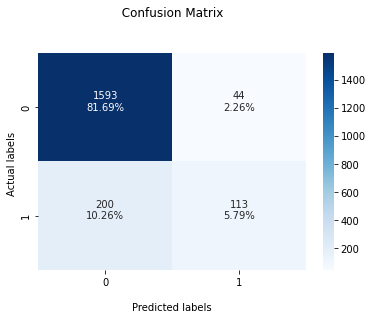

In [ ]:
plot_confusion_matrix(y_val_SS,y_pred_val_XGB_pipeline_SS_T1)

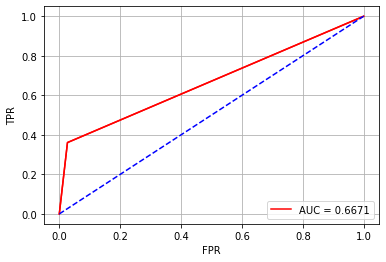

In [ ]:
plot_roc_curve(y_val_SS,y_pred_val_XGB_pipeline_SS_T1)

In [ ]:
y_predict_XGB_pipeline_SS_T1=XGB_pipeline.predict(x_test_SS_k)
y_predict_XGB_pipeline_SS_T1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_XGB_pipeline_SS_T1=XGB_pipeline.predict_proba(x_test_SS_k)
y_predict_pro_XGB_pipeline_SS_T1

array([[0.95737386, 0.04262616],
       [0.83817494, 0.16182505],
       [0.6845759 , 0.31542405],
       ...,
       [0.94196063, 0.05803937],
       [0.9418764 , 0.05812362],
       [0.98451346, 0.01548654]], dtype=float32)

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_XGB_pipeline_SS_T1[:,1]

submission.to_csv('XGB_pipeline_SS_T1.csv', index=False)

###trial (Grid Search with Cross-validation && XGBClassifier())


In [ ]:
XGB_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('XGB', 
           XGBClassifier(),
        )
    ]
)
XGB_pipeline

In [ ]:
# here we specify the search space
XGB_param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'XGB__n_estimators': [20, 30, 40],  
    'XGB__max_depth':[10, 20, 30]       
}

Fitting 2 folds for each of 18 candidates, totalling 36 fits
best score 0.8495952375458081
best score {'my_classifier__max_depth': 20, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_XGB_SS = GridSearchCV(
    XGB_pipeline, XGB_param_grid, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search_XGB_SS.fit(X_train_SS, y_train_SS)

In [ ]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_XGB_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search_XGB_SS.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search_XGB_SS.best_estimator_))

In [ ]:
grid_search_XGB_SS.best_estimator_.fit(X_train_SS,y_train_SS)

DecisionTreeClassifier(max_depth=4)

In [ ]:
grid_search_XGB_SS.best_estimator_.score(X_train_SS, y_train_SS)

0.8043478260869565

In [ ]:
y_pred_val_XGB_GS_SS=grid_search_XGB_SS.best_estimator_.predict(X_val_SS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_SS,y_pred_val_XGB_GS_SS) 
print("grid_search_XGB_FS_Accuracy:  " , (Accuracy))

XGB_pipeline_FS_T1_Accuracy:   0.8733333333333333


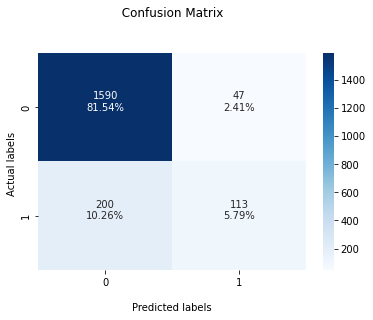

In [ ]:
plot_confusion_matrix(y_val_SS,y_pred_val_XGB_GS_SS)

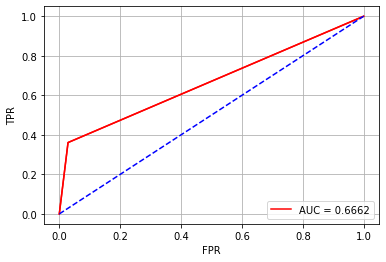

In [ ]:
plot_roc_curve(y_val_SS,y_pred_val_XGB_GS_SS)

In [ ]:
y_predict_XGB_GS_SS=grid_search_XGB_SS.best_estimator_.predict(x_test_SS_k)
y_predict_XGB_GS_SS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_XGB_GS_SS=grid_search_XGB_SS.best_estimator_.predict_proba(x_test_SS_k)
y_predict_pro_XGB_GS_SS

array([[0.962104  , 0.03789596],
       [0.8202545 , 0.17974551],
       [0.75078386, 0.24921615],
       ...,
       [0.9585454 , 0.04145461],
       [0.964332  , 0.03566801],
       [0.9868578 , 0.01314221]], dtype=float32)

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_XGB_GS_SS[:,1]

submission.to_csv('XGB_GS_SS.csv', index=False)

###trial (Random Search with validation set && XGBClassifier())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
# Split Data to Train and Validation
X_train_SS_VS, X_val_SS_VS, y_train_SS_VS, y_val_SS_VS = train_test_split(X_train_SS,y_train_SS, train_size = 0.8, stratify = y_train_SS,random_state =2022)

In [ ]:
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train_SS_VS.index else 0 for x in X_train_SS.index]
# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

In [ ]:
XGB_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('XGB', 
           XGBClassifier(),
        )
    ]
)
XGB_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                             

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
XGB_param_grid = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'XGB__n_estimators': [20, 30, 40],  
    'XGB__max_depth':[10, 20, 30]       
}

In [ ]:
#calculate running time
%%time
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
Random_search_XGB_SS = RandomizedSearchCV(
    XGB_pipeline, XGB_param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

Random_search_XGB_SS.fit(X_train_SS, y_train_SS)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
CPU times: user 2.14 s, sys: 18.5 ms, total: 2.15 s
Wall time: 14.8 s


RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['round',
                                                                                'order',
                                                                                'int_corr',
                                                           

In [ ]:
# best score achieved during the RandomizedSearchCV
print('Random_search VS best score : {:.4f}\n\n'.format(Random_search_XGB_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (Random_search_XGB_SS.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (Random_search_XGB_SS.best_estimator_))

Random_search VS best score : 0.8616


Parameters that give the best results : 

 {'preprocessor__num__imputer__strategy': 'mean', 'XGB__n_estimators': 40, 'XGB__max_depth': 10}


Estimator that was chosen by the search : 

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf

In [ ]:
Random_search_XGB_SS.best_estimator_.fit(X_train_SS, y_train_SS)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                             

In [ ]:
Random_search_XGB_SS.best_estimator_.score(X_train_SS, y_train_SS)

0.9982318767365497

In [ ]:
y_pred_val_XGB_RS_SS=Random_search_XGB_SS.best_estimator_.predict(X_val_SS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_SS,y_pred_val_XGB_RS_SS) 
print("Randomize_search_XGB_FS_Accuracy:  " , (Accuracy))

Randomize_search_XGB_FS_Accuracy:   0.8651282051282051


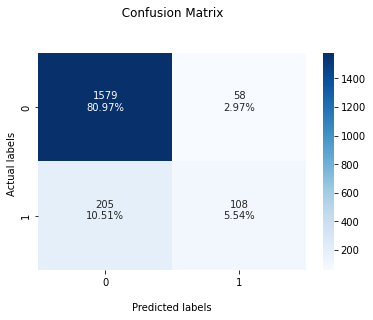

In [ ]:
plot_confusion_matrix(y_val_SS,y_pred_val_XGB_RS_SS)

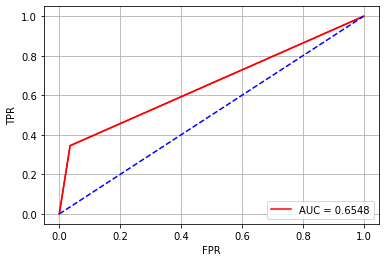

In [ ]:
plot_roc_curve(y_val_SS,y_pred_val_XGB_RS_SS)

In [ ]:
y_predict_XGB_RS_SS=Random_search_XGB_SS.best_estimator_.predict(x_test_SS_k)
y_predict_XGB_RS_SS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_XGB_RS_SS=Random_search_XGB_SS.best_estimator_.predict_proba(x_test_SS_k)
y_predict_pro_XGB_RS_SS

array([[0.9600464 , 0.03995356],
       [0.84927607, 0.15072393],
       [0.8448235 , 0.15517649],
       ...,
       [0.8895511 , 0.11044892],
       [0.9778919 , 0.02210809],
       [0.9894573 , 0.01054271]], dtype=float32)

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_XGB_RS_SS[:,1]

submission.to_csv('XGB_RS_SS.csv', index=False)

###trial (Bayesian Search && RandomForestClassifier)


In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
RF_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('RandomForestClassifier', RandomForestClassifier()
        )
    ]
)
RF_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
# here we specify the search space
RF_param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'RandomForestClassifier__n_estimators': [20, 30, 40],
    'RandomForestClassifier__max_depth':[10, 20, 30]     
}

In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
bayes_search_RF_SS = BayesSearchCV(
     RF_pipeline, RF_param, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

bayes_search_RF_SS.fit(X_train_SS, y_train_SS)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 2 folds for each of 1 candidates, totalling 2 fits
CPU times: user 1min 26s, sys: 47.4 s, total: 2min 14s
Wall time: 2min 10s


In [ ]:
# best score achieved during the BayesSearchCV
print('BayesSearchCV best score : {:.4f}\n\n'.format(bayes_search_RF_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (bayes_search_RF_SS.best_params_))

# print estimator that was chosen by the BayesSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (bayes_search_RF_SS.best_estimator_))

BayesSearchCV best score : 0.8317


Parameters that give the best results : 

 OrderedDict([('RandomForestClassifier__max_depth', 10), ('RandomForestClassifier__n_estimators', 40), ('preprocessor__num__imputer__strategy', 'mean')])


Estimator that was chosen by the search : 

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
    

In [ ]:
bayes_search_RF_SS.best_estimator_.fit(X_train_SS,y_train_SS)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
bayes_search_RF_SS.best_estimator_.score(X_train_SS, y_train_SS)

0.8949229603435211

In [ ]:
y_pred_val_RF_BS_SS=bayes_search_RF_SS.best_estimator_.predict(X_val_SS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_SS,y_pred_val_RF_BS_SS) 
print("bayes_search_RF_SS_Accuracy:  " , (Accuracy))

bayes_search_svm_FS_Accuracy:   0.8558974358974359


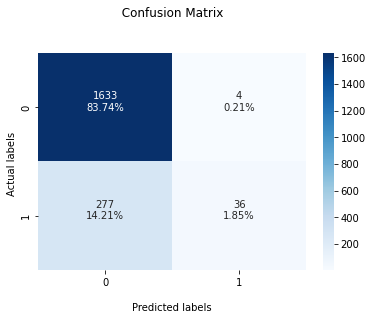

In [ ]:
plot_confusion_matrix(y_val_SS,y_pred_val_RF_BS_SS)

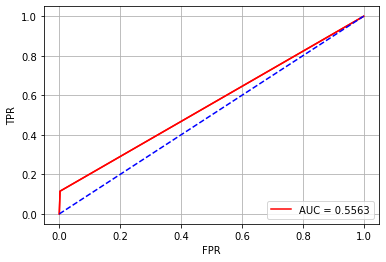

In [ ]:
plot_roc_curve(y_val_SS,y_pred_val_RF_BS_SS)

In [ ]:
y_pred_val_RF_BS_SS=bayes_search_RF_SS.best_estimator_.predict(x_test_SS_k)
y_pred_val_RF_BS_SS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_RF_BS_SS=bayes_search_RF_SS.best_estimator_.predict_proba(x_test_SS_k)
y_predict_pro_RF_BS_SS

array([[0.94622397, 0.05377603],
       [0.71839811, 0.28160189],
       [0.74995551, 0.25004449],
       ...,
       [0.94581504, 0.05418496],
       [0.89377069, 0.10622931],
       [0.9339149 , 0.0660851 ]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_RF_BS_SS[:,1]

submission.to_csv('RF_BS_SS.csv', index=False)

###trial (Random search && svm())

In [ ]:
SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced',probability=True))
    ]
)
SVC_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'int_corr', 'age_o',
                                                   'pf_o_att', 'pf_o_sin',
                                                   'pf_o_int', 'pf_o_fun',
                                                   'pf_o_amb', 'pf_o_sha',
                                                   'attr_o', 'sinc_o',
                                                   'intel_o', 

In [ ]:
SVC_pipline_params = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'my_svc__C': [1, 10, 100, 1e3, 1e4, 1e5],
    'my_svc__gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
    'my_svc__degree': [1,2,3,4,5,6,7,8],
    'my_svc__kernel': ['linear', 'poly', 'rbf']
}

In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
random_search_svm_SS = RandomizedSearchCV(
    SVC_pipline, SVC_pipline_params, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

random_search_svm_SS.fit(X_train_SS, y_train_SS)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [ ]:
# best score achieved during the RandomizedSearchCV
print('RandomizedSearchCV best score : {:.4f}\n\n'.format(random_search_svm_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (random_search_svm_SS.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (random_search_svm_SS.best_estimator_))

In [ ]:
random_search_svm_SS.best_estimator_.fit(X_train_SS,y_train_SS)

In [ ]:
random_search_svm_FS.random_search_svm_SS.score(X_train_SS, y_train_SS)

In [ ]:
y_pred_val_svm_RS_SS=random_search_svm_SS.best_estimator_.predict(X_val_SS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_SS,y_pred_val_svm_RS_SS) 
print("random_search_svm_FS_Accuracy:  " , (Accuracy))

In [ ]:
plot_confusion_matrix(y_val_SS,y_pred_val_svm_RS_SS)

In [ ]:
plot_roc_curve(y_val_SS,y_pred_val_svm_RS_SS)

In [ ]:
y_predict_svm_RS_FS=random_search_svm_FS.best_estimator_.predict(x_test_SS_k)
y_predict_svm_RS_FS

In [ ]:
y_predict_pro_svm_RS_SS=y_pred_val_svm_RS_SS.best_estimator_.predict_proba(x_test_SS_k)
y_predict_pro_svm_RS_SS

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_svm_RS_SS[:,1]

submission.to_csv('svm_RS_SS.csv', index=False)

###trial (Random search && RandomForestClassifier())

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
RF_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('RandomForestClassifier', RandomForestClassifier()
        )
    ]
)
RF_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                             

In [ ]:
# here we specify the search space
RF_param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'RandomForestClassifier__n_estimators': [20, 30, 40],
    'RandomForestClassifier__max_depth':[10, 20, 30]     
}

In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
random_search_RF_SS = RandomizedSearchCV(
    RF_pipeline, RF_param, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

random_search_RF_SS.fit(X_train_SS, y_train_SS)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
CPU times: user 657 ms, sys: 11 ms, total: 668 ms
Wall time: 3.98 s


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['round',
                                                                                'order',
                                                                                'int_corr',
                                                                                'age_o',
                        

In [ ]:
# best score achieved during the RandomizedSearchCV
print('RandomizedSearchCV best score : {:.4f}\n\n'.format(random_search_RF_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (random_search_RF_SS.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (random_search_RF_SS.best_estimator_))

RandomizedSearchCV best score : 0.8308


Parameters that give the best results : 

 {'preprocessor__num__imputer__strategy': 'mean', 'RandomForestClassifier__n_estimators': 30, 'RandomForestClassifier__max_depth': 10}


Estimator that was chosen by the search : 

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
              

In [ ]:
random_search_RF_SS.best_estimator_.fit(X_train_SS,y_train_SS)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                             

In [ ]:
random_search_RF_SS.best_estimator_.score(X_train_SS, y_train_SS)

0.9429148774943168

In [ ]:
y_pred_val_RF_RS_SS=random_search_RF_SS.best_estimator_.predict(X_val_SS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_SS,y_pred_val_RF_RS_SS) 
print("random_search_LR_SS_Accuracy:  " , (Accuracy))

random_search_LR_SS_Accuracy:   0.861025641025641


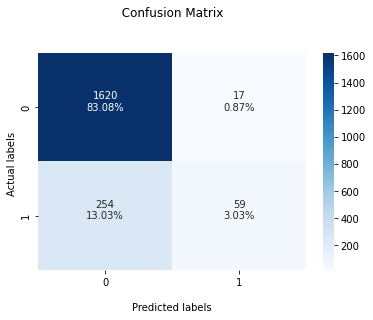

In [ ]:
plot_confusion_matrix(y_val_SS,y_pred_val_RF_RS_SS)

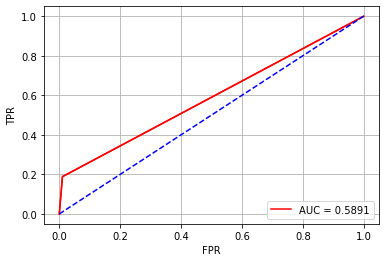

In [ ]:
plot_roc_curve(y_val_SS,y_pred_val_RF_RS_SS)

In [ ]:
y_predict_RF_RS_SS=random_search_RF_SS.best_estimator_.predict(x_test_SS_k)
y_predict_RF_RS_SS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_RF_RS_SS=random_search_RF_SS.best_estimator_.predict_proba(x_test_SS_k)
y_predict_pro_RF_RS_SS

array([[0.90987334, 0.09012666],
       [0.81574987, 0.18425013],
       [0.78911913, 0.21088087],
       ...,
       [0.96409679, 0.03590321],
       [0.90472569, 0.09527431],
       [0.97379361, 0.02620639]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_RF_RS_SS[:,1]

submission.to_csv('RF_RS_SS.csv', index=False)

###trial (Random search && logistic regression())

In [ ]:
# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
LR_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('LogisticRegression', LogisticRegression()
        )
    ]
)
LR_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                             

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
LR_param = {
    'preprocessor__num__imputer__strategy': ['mean','most_frequent'],
    'LogisticRegression__penalty':['l1','l2'], 
    'LogisticRegression__C':[1,1e2, 1e3,1e5],  
    'LogisticRegression__max_iter':[100,1000,10000],     
}

In [ ]:
#calculate running time
%%time
# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
random_search_LR_SS = RandomizedSearchCV(
    LR_pipeline, LR_param, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

random_search_LR_SS.fit(X_train_SS, y_train_SS)
pickle.dump(random_search_LR_SS, open("./clf_pipe.pck", "wb"))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

CPU times: user 607 ms, sys: 128 ms, total: 734 ms
Wall time: 3.19 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['round',
                                                                                'order',
                                                                                'int_corr',
                                                                                'age_o',
                        

In [ ]:
# best score achieved during the RandomizedSearchCV
print('RandomizedSearchCV best score : {:.4f}\n\n'.format(random_search_LR_SS.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (random_search_LR_SS.best_params_))

# print estimator that was chosen by the RandomizedSearchCV
print('\n\nEstimator that was chosen by the search :','\n\n', (random_search_LR_SS.best_estimator_))

RandomizedSearchCV best score : 0.8315


Parameters that give the best results : 

 {'preprocessor__num__imputer__strategy': 'most_frequent', 'LogisticRegression__penalty': 'l2', 'LogisticRegression__max_iter': 100, 'LogisticRegression__C': 100000.0}


Estimator that was chosen by the search : 

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                

In [ ]:
random_search_LR_SS.best_estimator_.fit(X_train_SS,y_train_SS)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['round', 'order', 'int_corr',
                                                   'age_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                     

In [ ]:
random_search_LR_SS.best_estimator_.score(X_train_SS, y_train_SS)

0.8747158373326598

In [ ]:
y_pred_val_LR_RS_SS=random_search_LR_SS.best_estimator_.predict(X_val_SS)

In [ ]:
#Accuracy
Accuracy=accuracy_score(y_val_SS,y_pred_val_LR_RS_SS) 
print("random_search_LR_SS_Accuracy:  " , (Accuracy))

random_search_LR_SS_Accuracy:   0.857948717948718


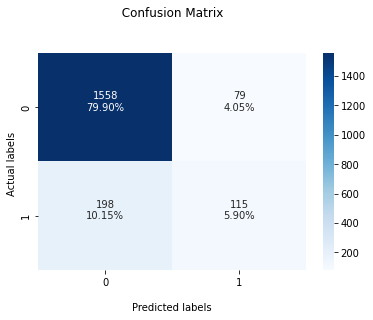

In [ ]:
plot_confusion_matrix(y_val_SS,y_pred_val_LR_RS_SS)

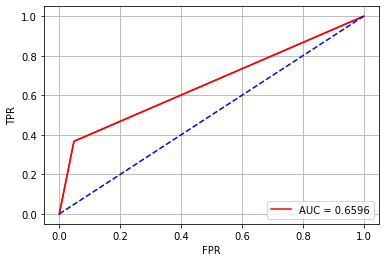

In [ ]:
plot_roc_curve(y_val_SS,y_pred_val_LR_RS_SS)

In [ ]:
y_predict_LR_RS_SS=random_search_LR_SS.best_estimator_.predict(x_test_SS_k)
y_predict_LR_RS_SS

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict_pro_LR_RS_SS=random_search_LR_SS.best_estimator_.predict_proba(x_test_SS_k)
y_predict_pro_LR_RS_SS

array([[0.76276222, 0.23723778],
       [0.65845402, 0.34154598],
       [0.79271978, 0.20728022],
       ...,
       [0.94376155, 0.05623845],
       [0.92359281, 0.07640719],
       [0.9613469 , 0.0386531 ]])

In [ ]:
submission = pd.DataFrame()

submission['id'] = df_test['id']

submission['match'] = y_predict_pro_LR_RS_SS[:,1]

submission.to_csv('LR_RS_SS.csv', index=False)